# Library Imports

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import h5py as h5 #to read the correlator
import numpy as np #to do everything
from pathlib import Path #to read the file's names
from typing import Any, Callable #to use annotations for functions
import matplotlib.pyplot as plt #to plot stuff
from tqdm import tqdm #for a nice view of for loops with loading bars
import os #to access enviromental variables

In [4]:
import sys

sys.path.insert(1, '../')

from moments_toolkit import moments_toolkit

# First tests

In [5]:
#p3fold = os.environ['mount_point_path'] + "48c48/binned_cut12_hmz370_BMW/3PointCorrelation/"
#p2fold = os.environ['mount_point_path'] + "48c48/binned_cut12_hmz370_BMW/2PointCorrelation/"

p3fold = os.environ['mount_point_path'] + "48c48/binned_1012_hmz370_BMW/3PointCorrelation/"
p2fold = os.environ['mount_point_path'] + "48c48/binned_1012_hmz370_BMW/2PointCorrelation/"

In [6]:
#p = Path(p3fold)#.glob('**/*')
#T_list = sorted( [int(x.name[1:]) for x in p.iterdir() if x.is_dir() and x.name.startswith('T')] )
#bb_pathList = [f"{p3fold}T{T}" for T in T_list]
#
#T_list
#bb_pathList


In [6]:
#sorted( [str(f.absolute()) for f in folders] )

In [6]:
ok = moments_toolkit(p3fold, p2fold,
                     maxConf=2, T_to_remove_list=[12,10],
                     verbose=True)


Initializing the moments_toolkit class instance...



Reading data for T = 6 ...


Initializing the building block class instance...


Looping over the configurations to read the building blocks from the h5 files...



100%|██████████| 2/2 [00:05<00:00,  2.64s/it]



Looping over the configurations to read the 2-point correlators from the h5 files...



100%|██████████| 2/2 [00:00<00:00, 34.25it/s]




Reading data for T = 7 ...


Initializing the building block class instance...


Looping over the configurations to read the building blocks from the h5 files...



100%|██████████| 2/2 [00:14<00:00,  7.06s/it]



Two-point correlators retrieved from previous class instance...



Reading data for T = 8 ...


Initializing the building block class instance...


Looping over the configurations to read the building blocks from the h5 files...



100%|██████████| 2/2 [00:03<00:00,  1.63s/it]



Two-point correlators retrieved from previous class instance...


Building the list of all available operators...


Class Initialization Complete!



In [ ]:
#ok.T_list
#ok.T_list.remove(12)
#ok.T_list

[6, 7, 8, 10, 12]

[6, 7, 8, 10]

In [9]:
ok.T_list

myTs = [6, 7, 8, 10, 12]

myTs.remove(12)

myTs

[6, 7, 8, 10, 12]

[6, 7, 8, 10]

In [8]:
bblist = ok.bb_list

[bb.nconf for bb in bblist]

[2, 2, 2, 2, 2]

In [9]:
ok.operator_show(show=True, verbose=True)


Generating the operators catalogue ...


Operators catalogue generated


Operators catalogue shown


Operators catalogue available in operator_catalogue.pdf



In [10]:
#ok.operator_show(remove_pdf=True, verbose=True)

In [11]:
from sympy import Symbol

x = Symbol('x')
y = Symbol('y')

f = x**3 + x

f.simplify()

f.subs({x**3:y})

f

x**3 + x

x + y

x**3 + x

In [12]:
[i for i in range(2,10)]

[2, 3, 4, 5, 6, 7, 8, 9]

In [13]:
type(f)

sympy.core.add.Add

In [14]:
op2 = ok.operator_list[1]

In [15]:
op2.id

2

In [16]:
len(ok.operator_list)

224

In [17]:
type(ok)

moments_toolkit.moments_toolkit

In [18]:
type(ok.operator_list)

type(ok.operator_list[1].id)

print(ok.operator_list[1].id)

list

int

2


In [19]:
ok.operator_list[1].O

1.0*O[1, 1] + 1.0*O[2, 2] + 1.0*O[3, 3] - 3.0*O[4, 4]

In [20]:
np.shape(ok.operator_list)

(224,)

In [7]:
ok.selected_op = []
#ok.select_operator(2,11)
ok.select_operator(28,32)

In [22]:
ok.selected_op[1].K

(-E(p)**3 - 2*E(p)**2*m_N - E(p)*m_N**2 + E(p)*p_1**2 + E(p)*p_2**2 - 3*E(p)*p_3**2 - 2*m_N*p_3**2)/(2*E(p)*(E(p) + m_N))

In [23]:
type(ok.selected_op[1].O)
type(ok.selected_op[1].K)

sympy.core.add.Add

sympy.core.mul.Mul

In [24]:
[display(l.O) for l in ok.selected_op]

1.0*O[1, 3] + 1.0*O[3, 1]

1.0*O[3, 4] + 1.0*O[4, 3]

[None, None]

In [25]:
import sympy as sym
sym.pprint(ok.selected_op[1].O)

1.0⋅O[3, 4] + 1.0⋅O[4, 3]


In [26]:
ok.selected_op

[O[1, 3] + O[3, 1], O[3, 4] + O[4, 3]]

In [27]:
np.shape( np.zeros(shape=(0,5,5),dtype=complex) )

(0, 5, 5)

In [28]:
okR, _,_,_ = ok.get_R()

/wsgjsc/home/taggi1/workspace_folders/PhD_work/moments_pdf/test_notebooks/../moments_toolkit.py:734: ComplexWarning: Casting complex values to real discards the imaginary part
  covmat[tuple(s)] = np.expand_dims( (nresamp-1)/nresamp * np.sum( (  np.take(obs_resamp,t1,axis=time_axis) - np.take(jack_mean,t1,axis=new_time_axis) ) * (  np.take(obs_resamp,t2,axis=time_axis) - np.take(jack_mean,t2,axis=new_time_axis) ), axis=0 ),


In [29]:
okR[0,0,0,:ok.T_list[0]+1]

array([-0.12857833+0.02184363j, -0.05500077+0.06200085j,
       -0.02850342+0.06846329j, -0.01334324+0.08485101j,
        0.02092891+0.09253396j,  0.01905115-0.01277117j,
       -0.0408818 -0.05416485j])

In [30]:
np.shape(okR)[:-1]

(2, 2, 5)

In [31]:
np.shape(okR)

(np.take(okR,1,axis=3) == okR[:,:,:,1]).all()

(2, 2, 5, 13)

np.True_

In [32]:
np.shape(okR) + (1,)

(2, 2, 5, 13, 1)

In [33]:
newA = np.zeros(shape=(3,4,6,8))

#np.take(newA,3,axis=2) = np.ones(shape=(3,4,8))
tmp = np.take(newA,5,axis=2)
tmp = np.ones(shape=(3,4,8))

newA[:,:,5,:]

array([[[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]]])

In [34]:
#np.shape( np.indices(dimensions=(3,4,6,8))

In [35]:
s = [slice(None)]*4
s



[slice(None, None, None),
 slice(None, None, None),
 slice(None, None, None),
 slice(None, None, None)]

In [36]:
s = [slice(None)]*4
axe1 = 2
idx = 4
s[axe1] = slice(idx,idx+1)
s

axe2 = 1
idx = 2
s[axe2] = slice(idx,idx+1)
s

newA[tuple(s)] = np.expand_dims( np.ones(shape=(3,8)) , [axe1,axe2])

[slice(None, None, None),
 slice(None, None, None),
 slice(4, 5, None),
 slice(None, None, None)]

[slice(None, None, None),
 slice(2, 3, None),
 slice(4, 5, None),
 slice(None, None, None)]

In [37]:
newA[:,:,4,:]

array([[[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0.]]])

In [38]:
s = [slice(None)]*4
s

axe = 2
idx = 4

slice(idx,idx+1)

s[axe] = slice(idx,idx+1)

s


newA[tuple(s)] = np.expand_dims( np.ones(shape=(3,4,8)) , axe)

newA[:,:,4,:]

[slice(None, None, None),
 slice(None, None, None),
 slice(None, None, None),
 slice(None, None, None)]

slice(4, 5, None)

[slice(None, None, None),
 slice(None, None, None),
 slice(4, 5, None),
 slice(None, None, None)]

array([[[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]]])

In [39]:
import itertools as it

In [40]:
for i in it.combinations(range(3),2):
    i

(0, 1)

(0, 2)

(1, 2)

In [41]:
S1, Smean1, Sstd1 = ok.get_S(1)
Smean1
S2, Smean2, Sstd2 = ok.get_S(2)
Smean1
S3, Smean3, Sstd3 = ok.get_S(3)
Smean1
np.shape(Smean1)

array([[-0.03818986+1.32480038e-01j, -0.17210443+3.80392783e-03j,
        -0.39508621-4.71615794e-01j,  0.59714215-6.51924576e-01j,
        -1.30829556-4.81048124e-01j],
       [-0.28167859-3.16136113e+00j, -0.56825395-4.37805820e+00j,
         0.05362585-4.38829733e+00j,  0.65106701-4.77098694e+00j,
         0.77833842-4.73118200e+00j]])

array([[-0.03818986+1.32480038e-01j, -0.17210443+3.80392783e-03j,
        -0.39508621-4.71615794e-01j,  0.59714215-6.51924576e-01j,
        -1.30829556-4.81048124e-01j],
       [-0.28167859-3.16136113e+00j, -0.56825395-4.37805820e+00j,
         0.05362585-4.38829733e+00j,  0.65106701-4.77098694e+00j,
         0.77833842-4.73118200e+00j]])

array([[-0.03818986+1.32480038e-01j, -0.17210443+3.80392783e-03j,
        -0.39508621-4.71615794e-01j,  0.59714215-6.51924576e-01j,
        -1.30829556-4.81048124e-01j],
       [-0.28167859-3.16136113e+00j, -0.56825395-4.37805820e+00j,
         0.05362585-4.38829733e+00j,  0.65106701-4.77098694e+00j,
         0.77833842-4.73118200e+00j]])

(2, 5)

In [42]:
np.shape(S1)
np.shape(Smean1)
np.shape(Sstd1)

(2, 2, 5)

(2, 5)

(2, 5)

/wsgjsc/home/taggi1/workspace_folders/PhD_work/moments_pdf/test_notebooks/../moments_toolkit.py:743: ComplexWarning: Casting complex values to real discards the imaginary part
  covmat[tuple(s)] = np.expand_dims( (nresamp-1)/nresamp * np.sum( (  np.take(obs_resamp,t1,axis=time_axis) - np.take(jack_mean,t1,axis=new_time_axis) ) * (  np.take(obs_resamp,t2,axis=time_axis) - np.take(jack_mean,t2,axis=new_time_axis) ), axis=0 ),
/wsgjsc/home/taggi1/workspace_folders/PhD_work/.venv/lib64/python3.11/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/wsgjsc/home/taggi1/workspace_folders/PhD_work/.venv/lib64/python3.11/site-packages/numpy/ma/core.py:3463: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


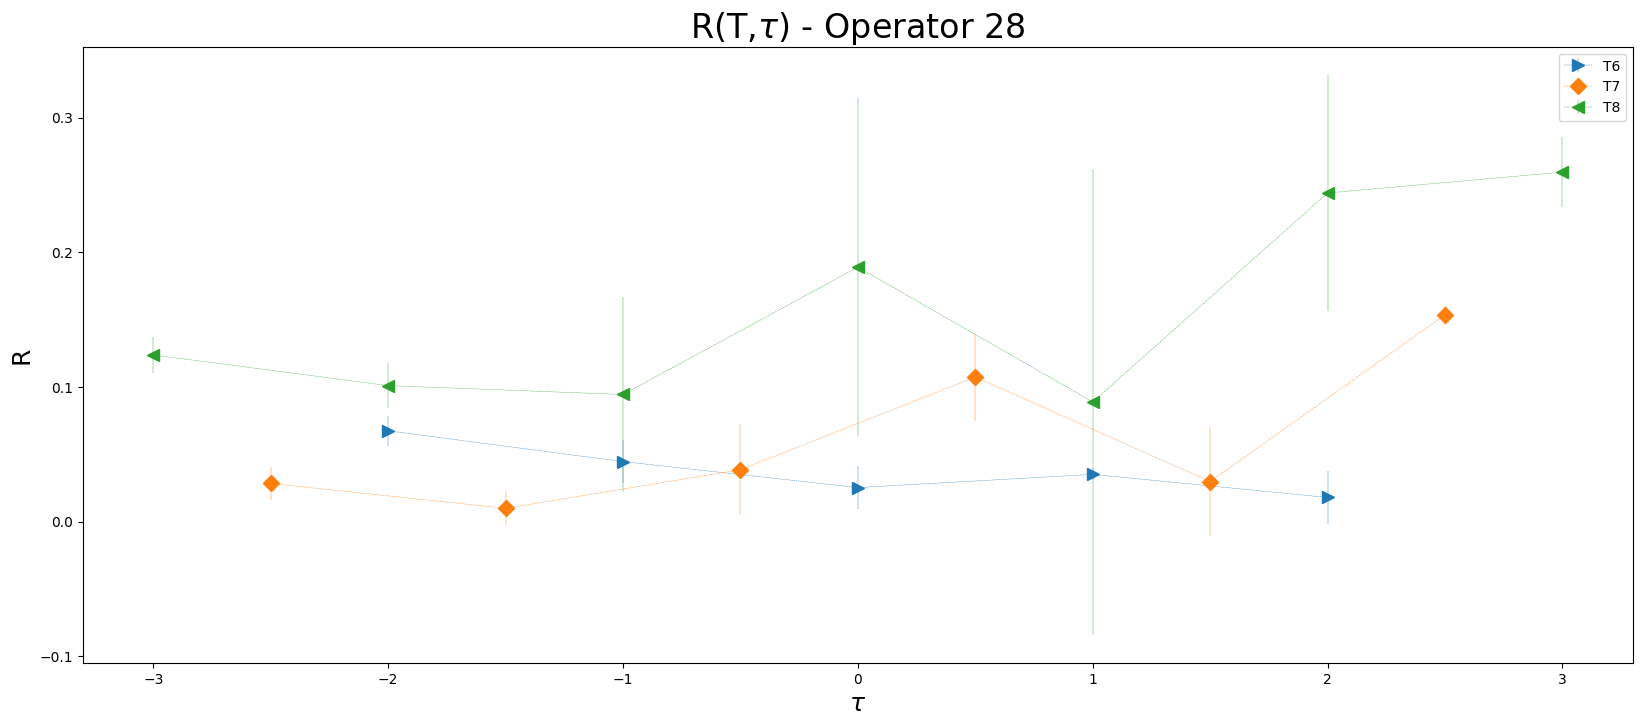

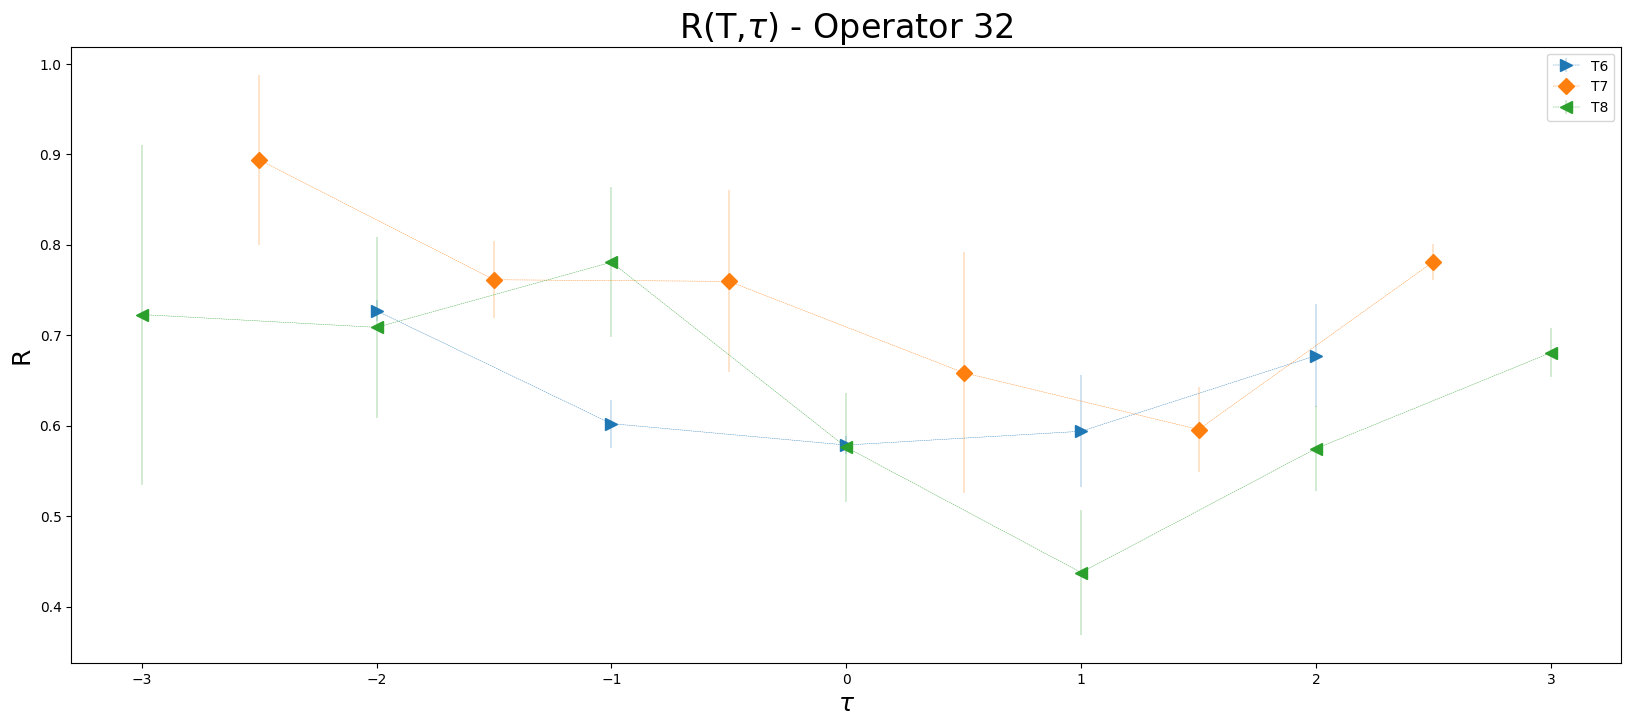

In [8]:
ok.plot_R(figsize=(20,8),fontsize_title=24,fontsize_x=18, fontsize_y=18, markersize=8)

In [44]:
from moments_toolkit import jackknife

In [45]:
def avg(in_array):
    return np.mean(in_array,axis=0)

p2corr = ok.bb_list[0].p2_corr

obs_mean, obs_std, covmat = jackknife(p2corr,avg,jack_axis=0,time_axis=-1)

In [46]:
np.shape(obs_mean)
np.shape(obs_std)
np.shape(covmat)

(48,)

(48,)

(48, 48)

In [47]:
def mymax(in_array):
    return np.max(in_array,axis=0)

In [48]:
obs_mean1, obs_std1, covmat1 = jackknife(p2corr,mymax,jack_axis=0,time_axis=-1)
np.shape(obs_mean1)
np.shape(obs_std1)
np.shape(covmat1)

(48,)

(48,)

(48, 48)

In [49]:
obs_mean2, obs_std2, covmat2 = jackknife(p2corr,lambda in_array : np.max(in_array, axis=0),jack_axis=0,time_axis=-1)
np.shape(obs_mean2)
np.shape(obs_std2)
np.shape(covmat2)

(48,)

(48,)

(48, 48)

In [50]:
(obs_mean1 == obs_mean2).all()

np.True_

In [51]:
len(np.shape(p2corr))
np.shape(p2corr)

2

(2, 48)

In [52]:
##function implementing the jackknife analysis
##def jackknife(in_array: np.ndarray, observable: Callable[[], Any], jack_axis=0, time_axis=-1, binsize=1,first_conf=0,last_conf=None) -> List[np.ndarray]:
#
#in_array = p2corr[:]
#
#observable = avg
#jack_axis = 0
#time_axis=-1
#
#binsize=1
#first_conf=0
#
#
##we set last conf to its default value
#last_conf = np.shape(in_array)[jack_axis]
#
##step 1: creation of the jackknife resamples
#jack_resamples = np.asarray( [np.delete(in_array, list(range(iconf,min(iconf+binsize,last_conf))) ,axis=jack_axis) for iconf in range(first_conf,last_conf,binsize)] ) #shape = (nresamp,) + shape(in_array) (with nconf -> nconf-binsize)
#print("jack resamples")
#print(np.shape(jack_resamples))
#
##the number of resamples is len(jack_resmaples[0]) or also
##nresamp = int((last_conf-first_conf)/binsize)
#nresamp = np.shape(jack_resamples)[0] #the 0th axis now is the resample axis, (and axis has nconf-1 conf in the standard case (binsize=1 ecc.) )
#
##step 2; for each resample we compute the observable of interest
##we use the resampled input array to compute the observable we want, and we have nresamp of them
#obs_resamp = np.asarray( [observable(jack_resamples[i]) for i in range(nresamp) ] )                                                                          #shape = (nresamp,) + shape(in_array) - jack_dimension
#print("obs resamples")
#print(np.shape(obs_resamp))
#
##step 3: we compute the observable also on the whole dataset
#obs = observable(in_array)                                                                                                                                   #shape = shape(in_array) - jack_dimension
#print("obs")
#print(np.shape(obs))
#
##step4: compute estimate, bias and std according to the jackknife method
#
##the estimate is the mean of the resamples
#jack_mean = np.mean(obs_resamp,axis=0) #axis 0 is the resamples one                                                                                         #shape = shape(in_array) - jack_dimension
#print("jack mean")
#print(np.shape(jack_mean))
#
##the jackknife bias is given by the following formula 
#bias = (nresamp-1) * (jack_mean - obs)                                                                                                                     #shape = shape(in_array) - jack_dimension
#print("bias")
#print(np.shape(bias))
#
##the jack std is given by the following formula
#obs_std = np.sqrt( (nresamp-1)/nresamp * np.sum( (obs_resamp - jack_mean)**2, axis=0 ) ) #the axis is the resamples one                                        #shape = shape(in_array) - jack_dimension
#print("obs std")
#print(np.shape(obs_std))
#
##to obtain the final estimate we correct the jack mean by the bias
#obs_mean = jack_mean - bias                                                                                                                                  #shape = shape(in_array) - jack_dimension
#
#
##step 5: covariance matrix computation
#
##to account for the fact that we have removed the jackknife dimension we change the time dimension
#
##first we compute the lenght in the time dimension
#lenT = np.shape(in_array)[time_axis]
#
##the time axis is translated to a positive value
#if time_axis<0:
#    #time_axis = lenT+time_axis
#    time_axis = len(np.shape(in_array))+time_axis
#
##then we check if the time dimension has to be reduced by one (i.e. if the just deleted jack axis causes the time axis to be smaller by 1)
#if jack_axis < time_axis :
#    new_time_axis = time_axis - 1
#
##we the instantiate the covariance matrix
#covmat = np.zeros(shape = np.shape(obs_mean) + (lenT,), dtype=float )
#
##we then loop over the times and fill the covariance matrix
#for t1 in range(lenT):
#    for t2 in range(lenT):
#
#        #we do a little of black magic to addres the right indices combinations (credit https://stackoverflow.com/questions/68437726/numpy-array-assignment-along-axis-and-index)
#        s = [slice(None)] * len(np.shape(covmat))
#        print(len(np.shape(covmat)))
#        axe1 = new_time_axis #position of the first time axis
#        print(f"axe1 {axe1}")
#        s[axe1] = slice(t1,t1+1)
#        axe2 =  len(np.shape(covmat))-1 #because the new time axis is at the end of the array
#        print(f"axe2 {axe2}")
#        s[axe2] = slice(t2,t2+1)
#
#        #we update the covariance matrix
#        covmat[tuple(s)] = np.expand_dims( (nresamp-1)/nresamp * np.sum( (  np.take(obs_resamp,t1,axis=time_axis) - np.take(obs,t1,axis=new_time_axis) ) * (  np.take(obs_resamp,t2,axis=time_axis) - np.take(obs,t2,axis=new_time_axis) ), axis=0 ),
#                                            [axe1,axe2])
#
#
#
#
##we return mean and std 
##return [obs_mean, obs_std, covmat]

In [53]:
#np.shape(covmat)

In [54]:
#np.take(obs,t1,axis=time_axis)

/wsgjsc/home/taggi1/workspace_folders/PhD_work/.venv/lib64/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<ErrorbarContainer object of 3 artists>

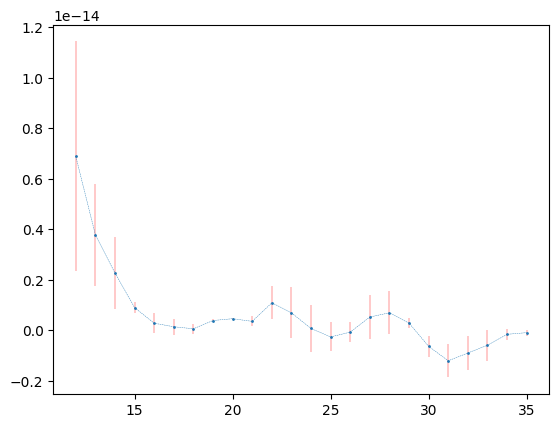

In [55]:
obs_mean, obs_std, covmat = jackknife(p2corr,lambda in_array : np.mean(in_array, axis=0),jack_axis=0,time_axis=-1)

cut = 12

times = np.arange(np.shape(obs_mean)[0])

plt.errorbar(times[cut:-cut], obs_mean[cut:-cut], yerr = obs_std[cut:-cut], marker = 'o', markersize = 1.0, linewidth = 0.3, linestyle='dashed', ecolor='red')

In [56]:
obs_mean, obs_std, covmat = jackknife(p2corr.real,lambda in_array : np.mean(in_array, axis=0),jack_axis=0,time_axis=-1)

(np.sqrt(np.diag(covmat)) == np.abs(obs_std) ).all()

np.True_

In [57]:
np.shape(covmat)

(48, 48)

In [58]:
np.array(0)

array(0)

In [59]:
np.diag([[1,2,4],
         [5,6,8]])

array([1, 6])

In [60]:
np.shape( np.diag(obs_std) )

(48, 48)

In [61]:
len( np.diag(np.diag(obs_std) ) )

48

In [62]:
S1, Smean1, Sstd1 = ok.get_S(1)

Smean1
Sstd1
np.shape(Smean1)
np.shape(Sstd1)

array([[-0.03818986+1.32480038e-01j, -0.17210443+3.80392783e-03j,
        -0.39508621-4.71615794e-01j,  0.59714215-6.51924576e-01j,
        -1.30829556-4.81048124e-01j],
       [-0.28167859-3.16136113e+00j, -0.56825395-4.37805820e+00j,
         0.05362585-4.38829733e+00j,  0.65106701-4.77098694e+00j,
         0.77833842-4.73118200e+00j]])

array([[0.0186775 -0.16259791j, 0.08893972-0.1638715j ,
        0.402637  +0.22069489j, 0.8395571 -0.60196127j,
        0.65068933-2.04510508j],
       [0.11372046+0.34210563j, 0.43737472+0.88171237j,
        0.28855901-0.1975547j , 0.34269003+1.12541807j,
        1.10913691-0.45879253j]])

(2, 5)

(2, 5)

/wsgjsc/home/taggi1/workspace_folders/PhD_work/moments_pdf/test_notebooks/../moments_toolkit.py:897: RuntimeWarning: divide by zero encountered in divide
  return np.sum( (deltas/sig)**2 ) / len_plat


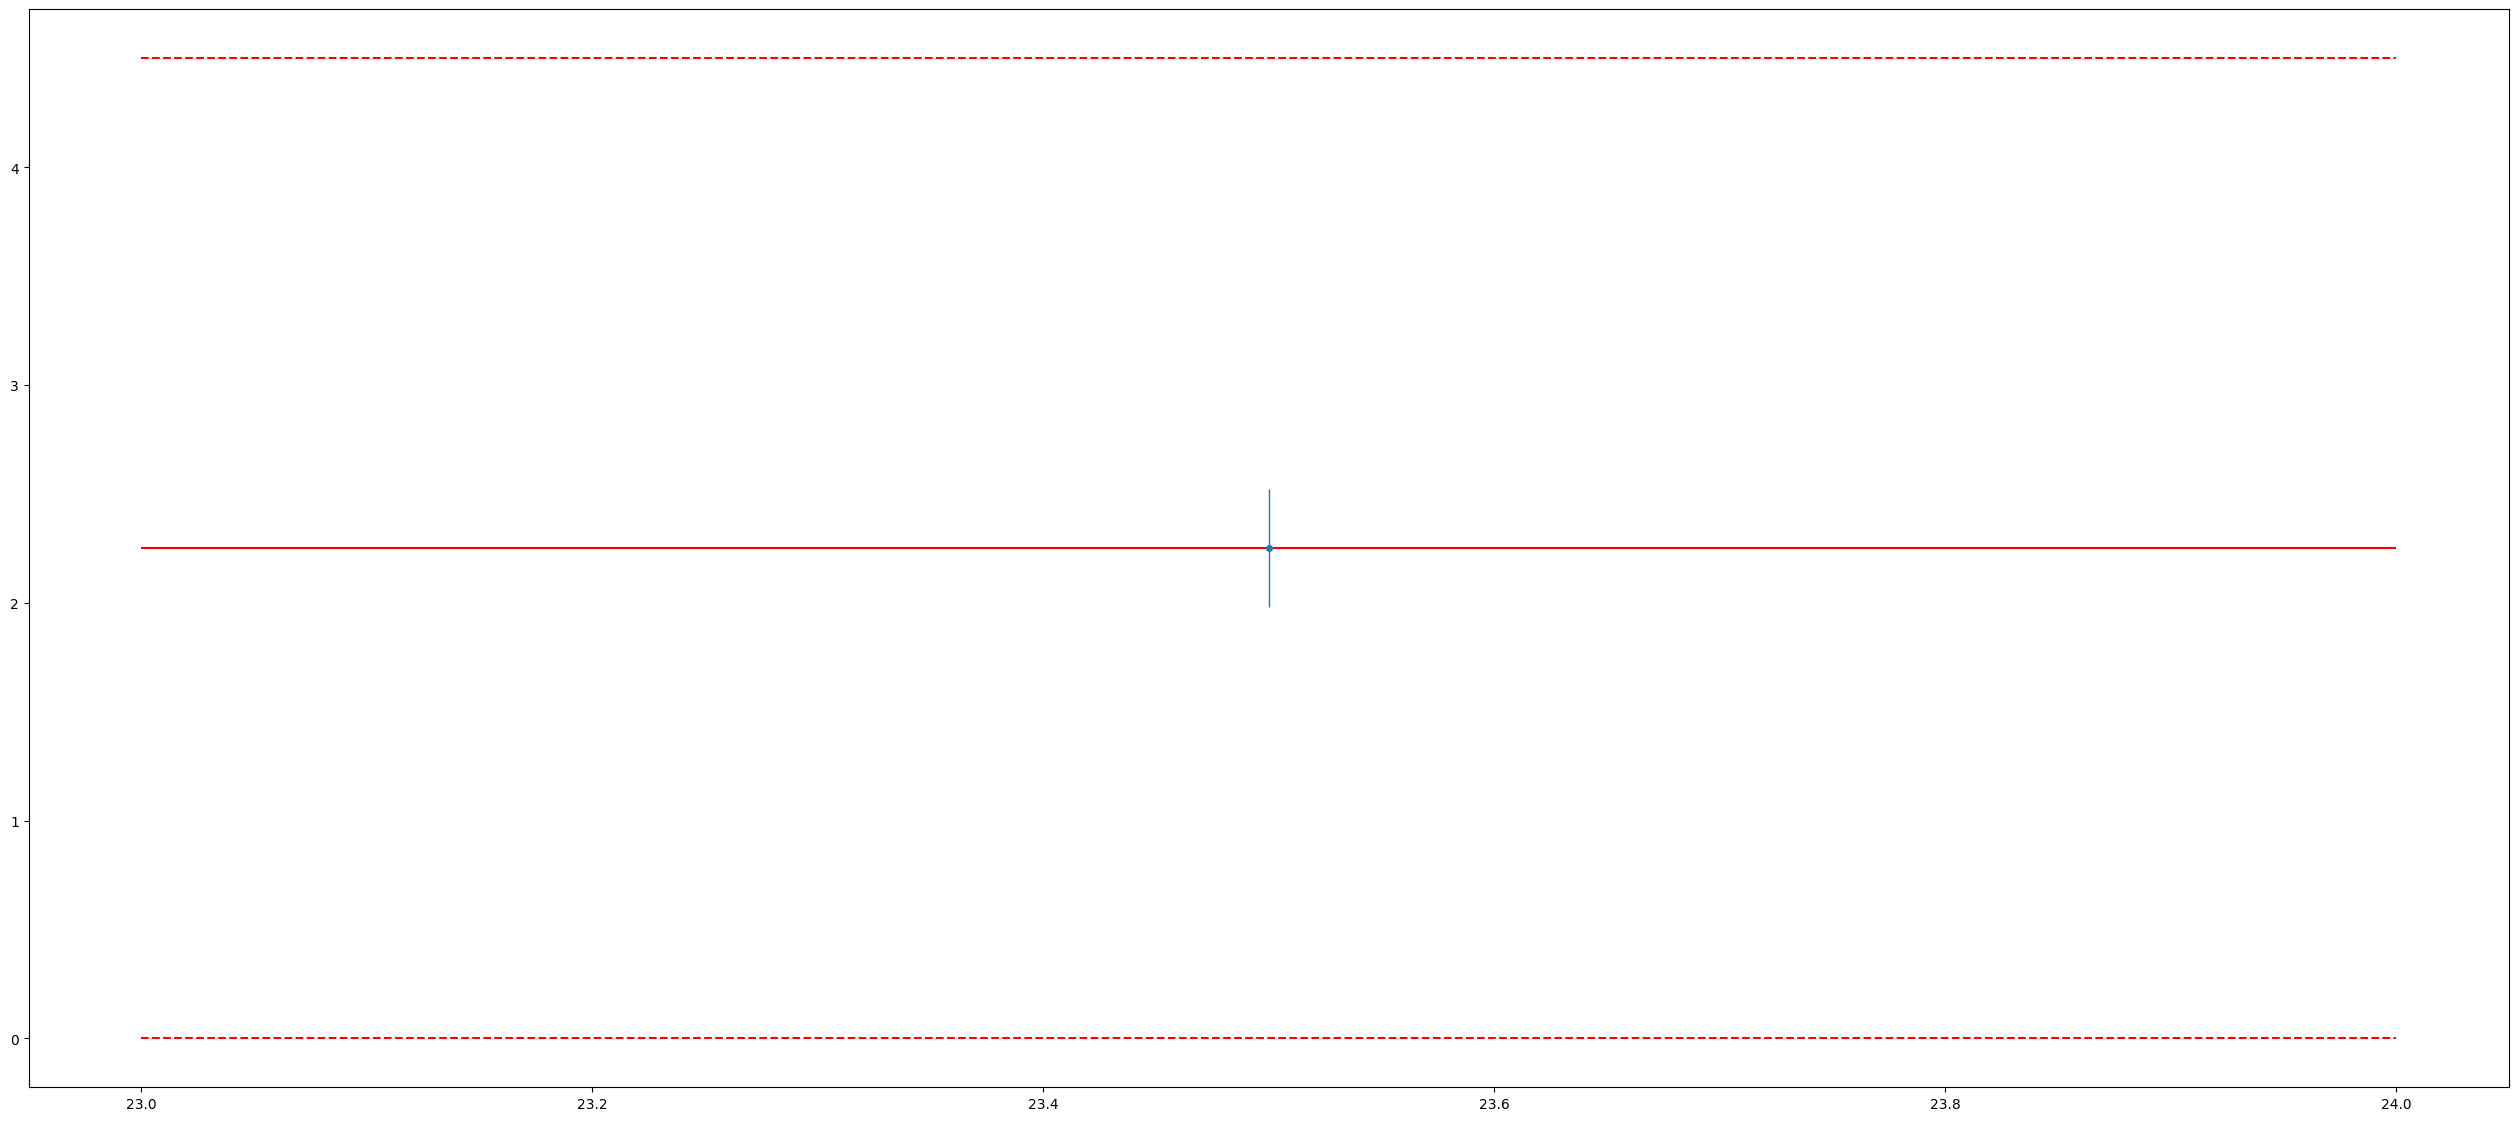

(np.float64(2.250356888832086), np.float64(2.250356888832086))

In [63]:
ok.get_meff(show=True,zoom=0,chi2_treshold=1.0)

In [64]:
#function used to extract the effective mass for the two-point correlators
def effective_mass(corr_2p: np.ndarray, conf_axis=0) -> np.ndarray:
    """
    Input:
        - corr_2p: two point correlators, with shape (nconf, Tlat) (with Tlat being the time extent of the lattice)

    Output:
        - m_eff(t): the effective mass, with shape (Tlat,) (the configuration axis gets removed) (the shape is Tlat and not Tlat-1, so that the jackknife function can be used)
    """

    #we first take the gauge average of the two point correlator
    corr_gavg = np.mean(corr_2p, axis=conf_axis)

    #we get the lattice time T
    Tlat = np.shape(corr_gavg)[0]

    #we instantiate the eff mass array with first dimension of size Tlat (even tough the effective mass should have Tlat-1 time values --> the last will be a 0 of padding)
    meff = np.zeros((Tlat))

    #we compute the effective mass (the loop as it should goes up to Tlat-1, so that the last entry of meff is a 0 of padding)
    for t in range(Tlat-1): 
        #meff[t] = np.log( (corr_gavg[t]/corr_gavg[t+1]).real )
        #to compute the mass we need the ratio of the 2-points correlator
        ratio_2p = corr_gavg[t]/corr_gavg[t+1]

        #then we just need to take the log, but for that the ratio has to be bigger than 1 (??)   (if that does not happen then the mass is set to 0 -> as done in the initialization above)
        if ratio_2p >= 1.0:
            meff[t] = np.log( ratio_2p )

    #we send back the effective mass
    return meff


In [65]:
#function that given a 1D array returns the cut values identifying its plateaux
def plateaux_search(in_array: np.ndarray, covmat: np.ndarray, chi2_treshold=1.0) -> tuple[int,int]:
    """
    Input:
        - in_array: the 1D array we want to search the plateaux of
        - covmat: a 2D array, representing the covariance matrix of in_array
        - chi2_treshold: the treshold for the plateaux determination
    
    Output:
        - let_cut: the number of data point to be discarded from the left (beginning of the array) to arrive at the plateaux
        - right_cut: the number of data point to be discarded from the right (end of the array) to arrive at the plateaux
    """

    #we set the max cut to be half of the allowed range for the 1D array
    max_cut = int( np.shape(in_array)[0] / 2 )

    #we loop over the cut we make (that is equal both from left and from right)
    for icut in range(1,max_cut):

        #then we also loop over the possible offset we'd like to have from the left and from the right (i.e. asymmetric cuts)
        for l_off in range(icut):
            for r_off in range(icut):

                #if the total cut is bigger than the array we break
                if 2*icut + l_off + r_off >= np.shape(in_array)[0]:
                    break
                
                #if instead the cut is ok we go on with the chi2 computation

                #the plataux region in this case is given by
                plat = in_array[l_off+icut:-icut-r_off]

                #the value of the plateau is
                plat_value = np.mean(plat,axis=0,keepdims=True)

                #we also have to reshape the covariance matrix
                covmat_plat = covmat[l_off+icut:-icut-r_off, l_off+icut:-icut-r_off]

                #we see if the chi2 meets the condition
                if redchi2_cov(plat, plat_value, covmat_plat) < chi2_treshold:
                    print(redchi2_cov(plat, plat_value, covmat_plat))
                    #in that case we return the values of found cuts
                    return icut + l_off, - icut - r_off

    #if by the end of the loop the chi2 condition is never met we return the cuts corresponding to the whole dataset
    return 0, np.shape(in_array)[0]

In [66]:
#function used to compute the reduced chi2 of a 1D array using the covariance matrix
def redchi2_cov(in_array: np.ndarray, fit_array: np.ndarray, covmat: np.ndarray, only_sig=True) -> float:
    """
    Input:
        - in_array: a 1D array, with len T
        - fit_array: a 1D array, also with len T, representing the function we want the in_arrya fitted to
        - covmat: a 2D array with shape (T,T), representing the covariance matrix of in_array

    Output:
        - chi2: the reduced chi2 of the fit
    """

   

    #then we compute the differences between the fit and input array
    deltas = in_array - fit_array

    #then we compute the len of the plateaux
    len_plat = np.shape(in_array)[0]

    #then we compute the reduced chi2 according to its formula and we return it
    #return np.einsum( 'j,j->' , deltas, np.einsum('jk,k->j',cov_inv,deltas) ) / len_plat

    if only_sig==False:
         #first we invert the covariance array
        cov_inv = np.linalg.inv(covmat)
        #then we compute the reduced chi2 according to its formula and we return it
        return np.einsum( 'j,j->' , deltas, np.einsum('jk,k->j',cov_inv,deltas) ) / len_plat
    else:
        sig = np.sqrt(np.diag(covmat))
        return np.sum( (deltas/sig)**2 ) / len_plat

In [67]:
#first we recall the two point correlators
corr_2p = np.abs( ok.bb_list[0].p2_corr )

#we use the jackknife to compute the effective mass (mean and std)
meff, meff_std, meff_covmat = jackknife(corr_2p, effective_mass, jack_axis=0, time_axis=-1)

#we determine the time extent of the lattice
Tlat = np.shape(meff)[0]

#we discard the padding coming from the effective_mass function
meff = meff[:-1]
meff_std = meff_std[:-1]
meff_covmat = meff_covmat[:-1,:-1]

np.shape(meff)
np.shape(meff_std)
np.shape(meff_covmat)


#we determine the time values to be displayed on the plot
m_times = np.arange(np.shape(meff)[0]) + 0.5



#we compute a mean value and a std from the plateaux

#first we identify the boundaries of the plateau region
lcut, rcut = plateaux_search(meff,meff_covmat, chi2_treshold=0.1)

(47,)

(47,)

(47, 47)

0.0019626743410312984


/tmp/ipykernel_3067534/792315232.py:31: RuntimeWarning: divide by zero encountered in divide
  return np.sum( (deltas/sig)**2 ) / len_plat


In [68]:
meff_std

array([0.00850718, 0.00962299, 0.02673553, 0.02617392, 0.02866971,
       0.01653539, 0.05853615, 0.19446942, 0.0113339 , 0.12456134,
       0.05085637, 0.17286376, 0.14471384, 0.05608568, 0.01555622,
       0.07637237, 0.25813628, 0.24755947, 0.12544514, 0.18695952,
       0.7765154 , 0.        , 0.06528337, 0.26835337, 0.18950705,
       0.28568409, 0.03483625, 0.        , 0.27492857, 0.        ,
       0.        , 0.65558739, 0.13401169, 0.56327858, 1.2032802 ,
       0.        , 0.        , 0.        , 0.74709471, 0.32308054,
       0.        , 0.19487316, 0.16411827, 0.        , 0.        ,
       0.        , 0.        ])

In [69]:
np.sqrt( np.diag(meff_covmat) )

array([0.00850718, 0.00962299, 0.02673553, 0.02617392, 0.02866971,
       0.01653539, 0.05853615, 0.19446942, 0.0113339 , 0.12456134,
       0.05085637, 0.17286376, 0.14471384, 0.05608568, 0.01555622,
       0.07637237, 0.25813628, 0.24755947, 0.12544514, 0.18695952,
       0.7765154 , 0.        , 0.06528337, 0.26835337, 0.18950705,
       0.28568409, 0.03483625, 0.        , 0.27492857, 0.        ,
       0.        , 0.65558739, 0.13401169, 0.56327858, 1.2032802 ,
       0.        , 0.        , 0.        , 0.74709471, 0.32308054,
       0.        , 0.19487316, 0.16411827, 0.        , 0.        ,
       0.        , 0.        ])

In [70]:
meff[lcut:rcut]

lenpl = np.shape(meff[lcut:rcut])[0]
lenpl

pl = np.mean(meff[lcut:rcut],axis=0,keepdims=True)
pl
delt = meff[lcut:rcut] - pl
delt


invcov = np.linalg.inv( meff_covmat[lcut:rcut,lcut:rcut] )
invcov

#sig = meff_std[lcut:rcut]
sig = np.sqrt(np.diag( meff_covmat[lcut:rcut,lcut:rcut]))

delt @ invcov @ delt /lenpl

np.sum( (delt/sig)**2 )/lenpl

array([0.25596799, 0.23527177, 0.25363392])

3

array([0.24829123])

array([ 0.00767676, -0.01301946,  0.0053427 ])

LinAlgError: Singular matrix

In [ ]:
lcut, rcut

(23, -23)

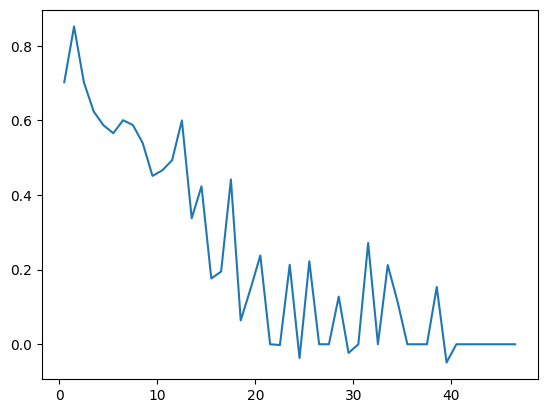

In [ ]:
plt.plot(m_times,meff)

In [ ]:
ok.selected_op

[O[1, 3] + O[3, 1], O[3, 4] + O[4, 3]]

In [ ]:
op73 = ok.get_operator(73)
op74 = ok.get_operator(74)

op73
op74

opSum = op73 + op74
opSum

opDiff = op73 - op74
opDiff

opMul = 1/np.sqrt(2) * ok.get_operator(28)
opMul
opMul.K

opMul = ok.get_operator(28) * (1/np.sqrt(2))
opMul

opDiv = ok.get_operator(28) * 1/np.sqrt(2)
opDiv

opDiv = ok.get_operator(28) * np.sqrt(2)
opDiv

O[1, 2, 2] - O[1, 3, 3]/2 - O[1, 4, 4]/2

O[2, 1, 1] - O[2, 3, 3]/2 - O[2, 4, 4]/2

O[1, 2, 2] - O[1, 3, 3]/2 - O[1, 4, 4]/2 + O[2, 1, 1] - O[2, 3, 3]/2 - O[2, 4, 4]/2

O[1, 2, 2] - O[1, 3, 3]/2 - O[1, 4, 4]/2 - O[2, 1, 1] + O[2, 3, 3]/2 + O[2, 4, 4]/2

707106781186547*O[1, 3]/1000000000000000 + 707106781186547*O[3, 1]/1000000000000000

0.707106781186547*I*p_1*(E(p)*m_N + m_N**2 + 2*p_3**2)/(E(p)*(E(p) + m_N))

707106781186547*O[1, 3]/1000000000000000 + 707106781186547*O[3, 1]/1000000000000000

707106781186547*O[1, 3]/1000000000000000 + 707106781186547*O[3, 1]/1000000000000000

14142135623731*O[1, 3]/10000000000000 + 14142135623731*O[3, 1]/10000000000000

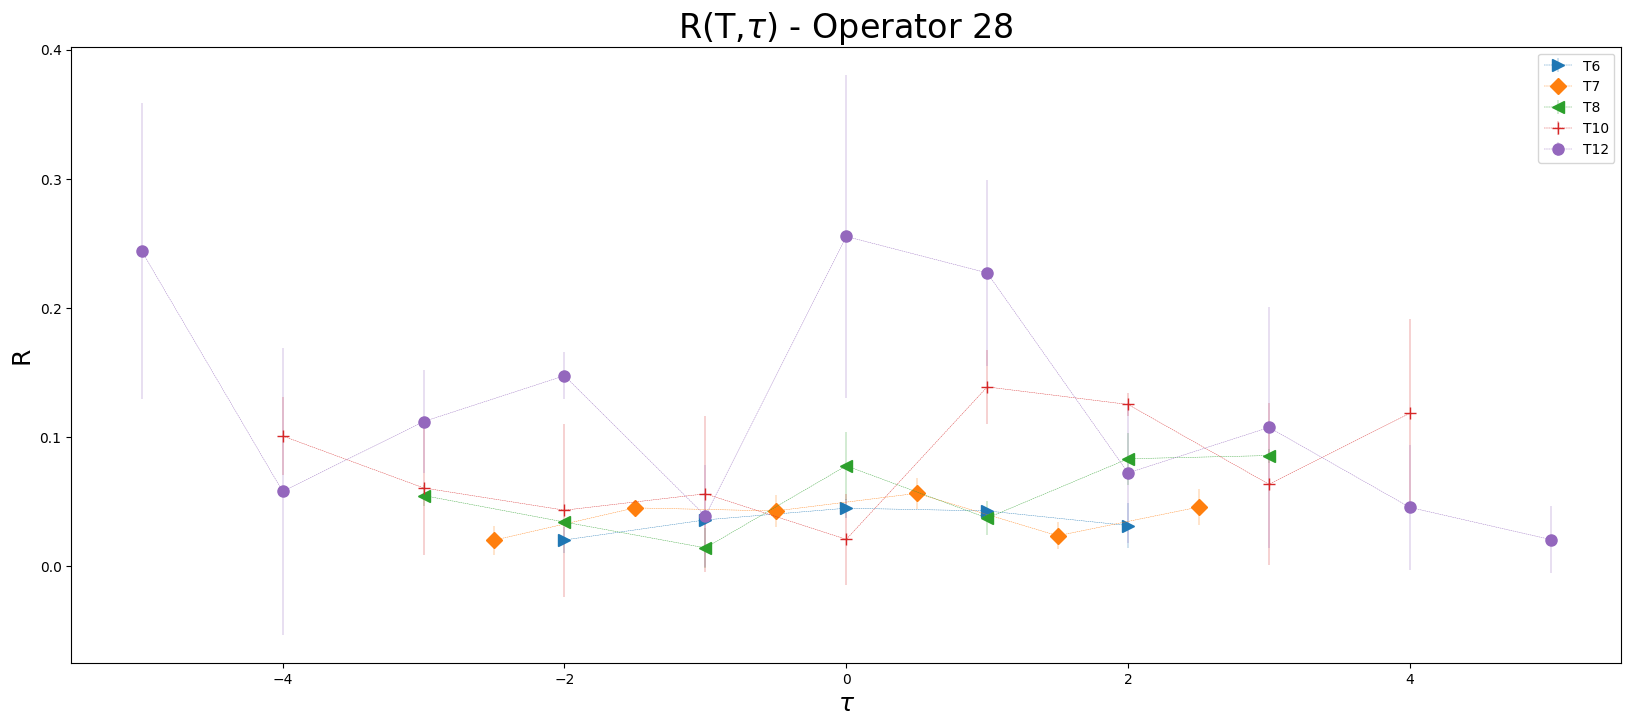

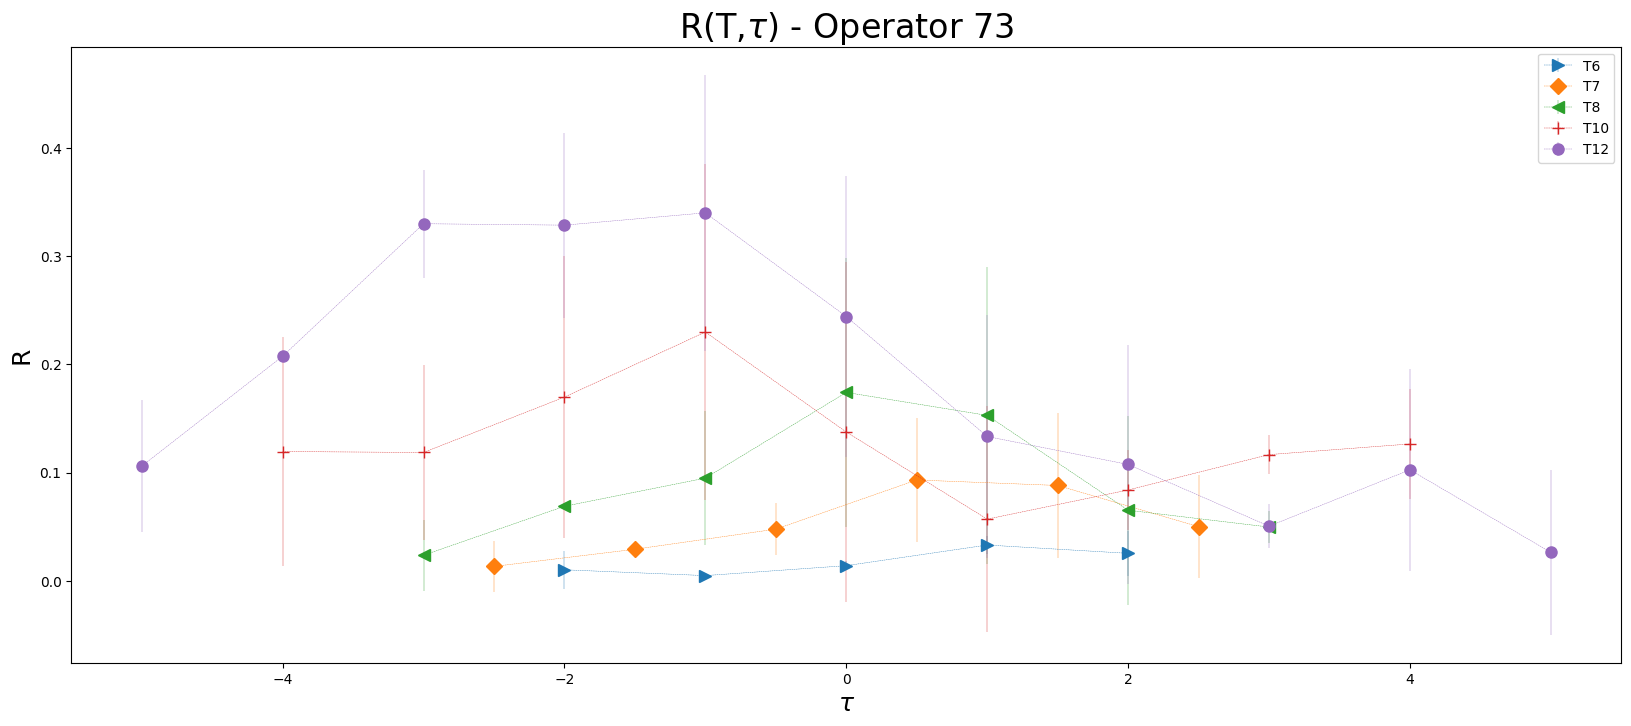

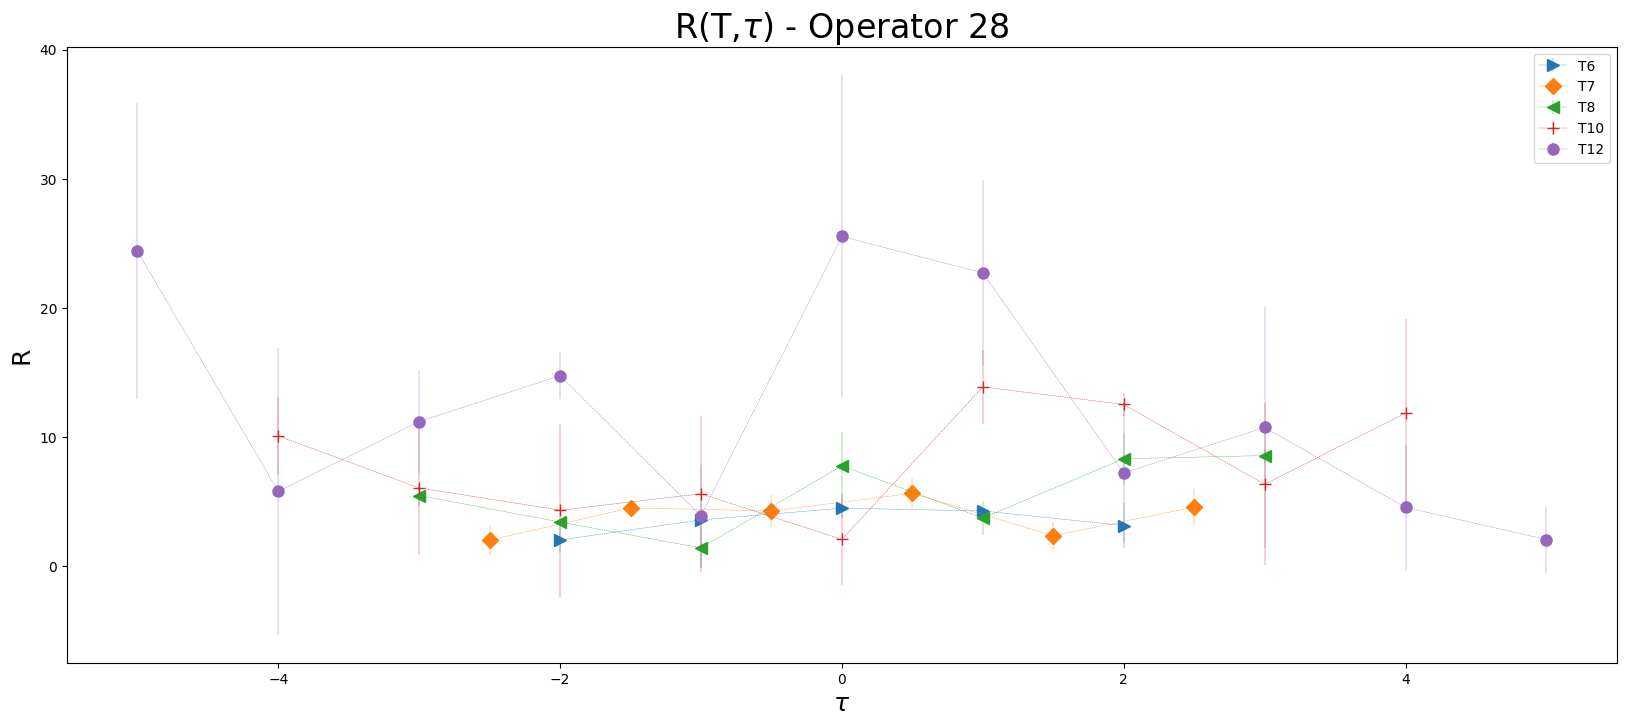

In [ ]:
ok.select_operator(28,73)

ok.selected_op.append(ok.get_operator(28) * 100)

ok.plot_R()

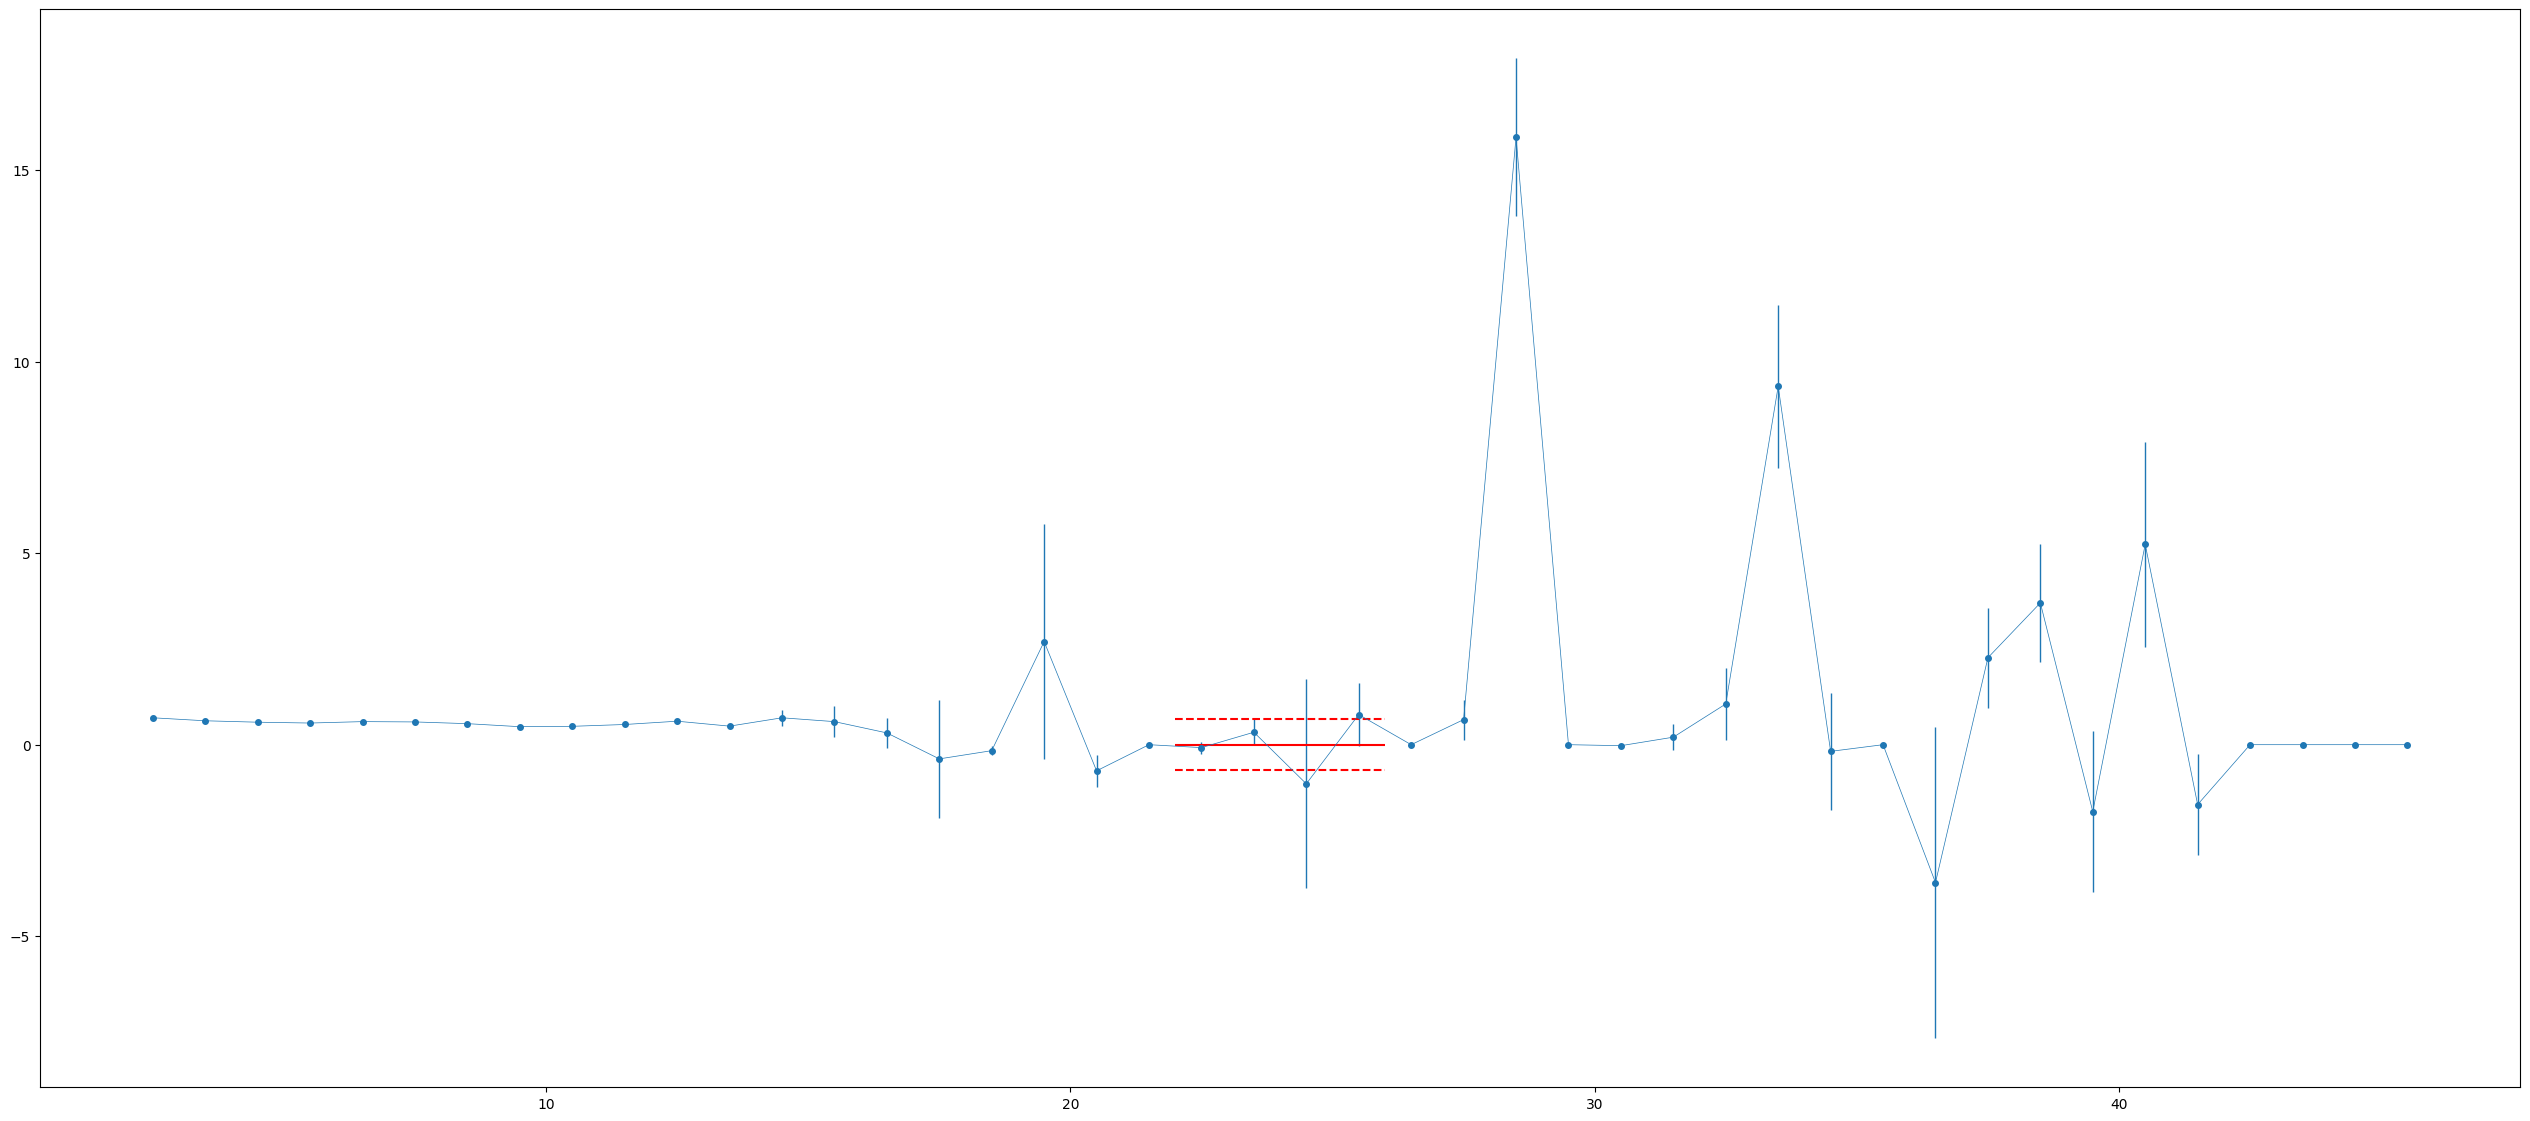

(np.float64(0.003467872123568305), np.float64(0.665479289018521))

In [ ]:
ok.get_meff(show=True,zoom=20,chi2_treshold=1.0)

(7, 48)

2.005372044459308
2.3398473613756234
2.0387049489997486
1.8556076887135315
1.7894859066695656
1.7647866874105234
1.8104354185088685
1.735685714384358
1.7213718090394403
1.6064073211412349
1.6052813160961206
1.641742823137175
1.869870529475016
1.6007483480038063
2.127486520096729
1.9119699596613253
1.6409713475901924
2.5633329508050893
0.9005629699039649
-22.95382974360036
-0.18718228479449164
0.09364897383586199
0.8508068675032973
1.126561362983942
1.6131215647319501
1.7026498421802623
0.4835523172495155
1.4523795612090824
-44.823649549422875
0.024769446105627646
0.7517565680655345
0.9653133029451566
1.713992527646458
6.627103999884641
-1.52470719635504
0.03217963742500801
0.8134652064837559
1.1388610619296504
0.9471753845939397
11.562097022735388
0.09526341357841464
0.6367858824543756
0.2758047110910877
0.272355488664349
0.348551323647307
0.27132420453626704
0.21413861505840057
2.0107427816096437
2.3329088816939816
2.02163510842081
1.8710675491637991
1.804994796294691
1.75580797148457

<ErrorbarContainer object of 3 artists>

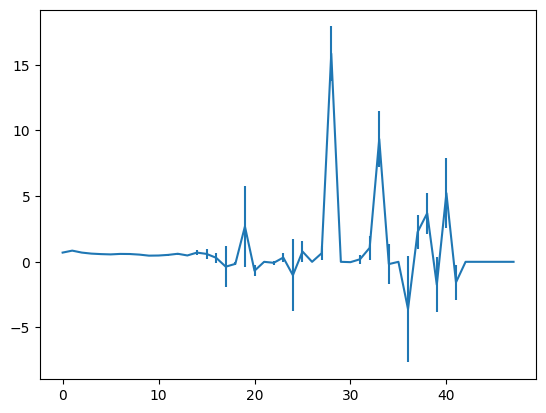

In [ ]:
def eff_mass_func(p2, confax=0):
    p2avg = np.mean(p2,axis=confax)
    T=np.shape(p2)[1]
    mff = np.zeros((T))
    for t in range(T-1):
            rat = p2avg[t]/p2avg[t+1]
            print(rat)
            if rat>=1.0:
                    mff[t] = np.log(rat)
    return mff

corr2p = ok.bb_list[0].p2_corr.real
np.shape(corr2p)
meff, meff_std, meff_covmat = jackknife(corr2p, eff_mass_func, jack_axis=0, time_axis=-1)


mtimes = np.arange(48)


plt.errorbar(mtimes,meff,yerr=meff_std)

/tmp/ipykernel_220832/1024443687.py:13: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(np.arange(47),mf,'-o', linestyle='dashed')


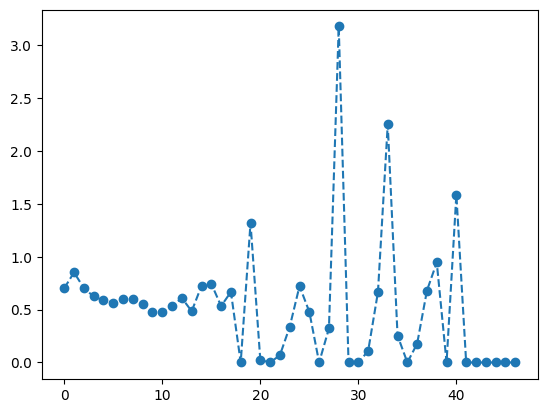

In [ ]:
corr2p = ok.bb_list[0].p2_corr.real
corr2p_avg = np.mean(corr2p,axis=0)

mf = np.zeros((47))

for t in range(47):
    rat = corr2p_avg[t]/corr2p_avg[t+1]
    if rat >= 1.0:
        mf[t] = np.log(rat)



plt.plot(np.arange(47),mf,'-o', linestyle='dashed')

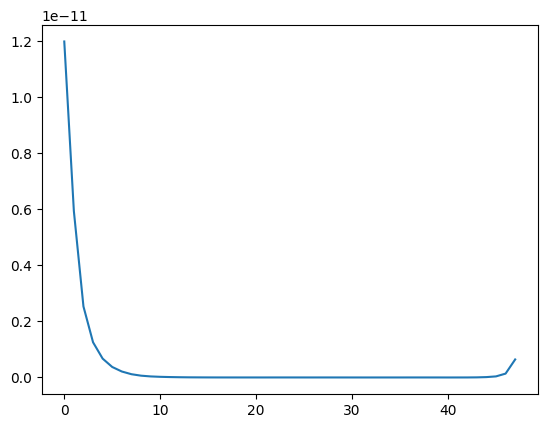

In [ ]:
plt.plot(times,corr2p_avg)

In [ ]:
#!pip install scipy

np.float64(1.201246309554931e-11)

np.float64(1.0502731939934512e-13)

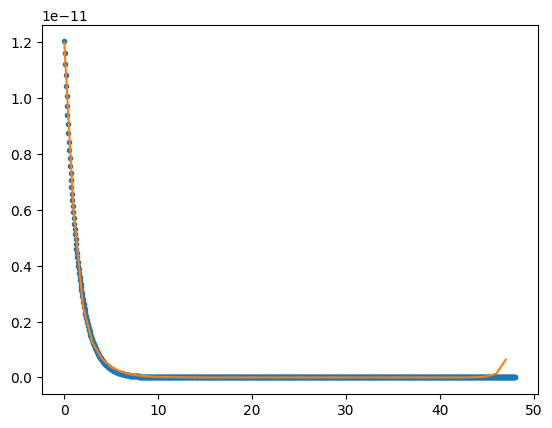

In [ ]:
from scipy.optimize import curve_fit

def fit_func(t,m,amp):
    return amp*np.exp(-m*t)

guess_mass = 0.5
guess_amp=corr2p_avg[0]
guess=[guess_amp,guess_mass]

times=np.arange(48)

fit_data=corr2p_avg

popt,pcov = curve_fit(fit_func, times, fit_data, p0=guess)#,maxfev = 1300)
perr = np.sqrt(np.diag(pcov))

mass = popt[1]
amp = popt[0]


linspaceT = np.linspace(0,48,1000)
fit_res = fit_func(linspaceT, *popt)

plt.plot(linspaceT,fit_res,'.')
plt.plot(times,fit_data)

mass
perr[1]

In [ ]:
mfit, mfit_std = ok.get_mfit()
mfit, mfit_std


(np.float64(0.7382717991921586), np.float64(0.006641137666342501))

In [ ]:
a = 0.1163

mfit/a * 197.327

np.float64(1252.6307766052541)

# fine ensamble analysis

In [ ]:
p3fold = os.environ['mount_point_path'] + "64c64/3pt_binned_h5/"
p2fold = os.environ['mount_point_path'] + "64c64/2pt_binned_h5/"

In [ ]:
ok2 = moments_toolkit(p3fold,p2fold,maxConf=2,verbose=True)


Initializing the moments_toolkit class instance...



Reading data for T = 10 ...


Initializing the building block class instance...


Looping over the configurations to read the building blocks from the h5 files...



100%|██████████| 2/2 [00:34<00:00, 17.42s/it]



Looping over the configurations to read the 2-point correlators from the h5 files...



100%|██████████| 2/2 [00:00<00:00, 55.32it/s]




Reading data for T = 13 ...


Initializing the building block class instance...


Looping over the configurations to read the building blocks from the h5 files...



100%|██████████| 2/2 [00:43<00:00, 21.61s/it]



Two-point correlators retrieved from previous class instance...



Reading data for T = 16 ...


Initializing the building block class instance...


Looping over the configurations to read the building blocks from the h5 files...



100%|██████████| 2/2 [00:59<00:00, 29.86s/it]



Two-point correlators retrieved from previous class instance...


Building the list of all available operators...


Class Initialization Complete!



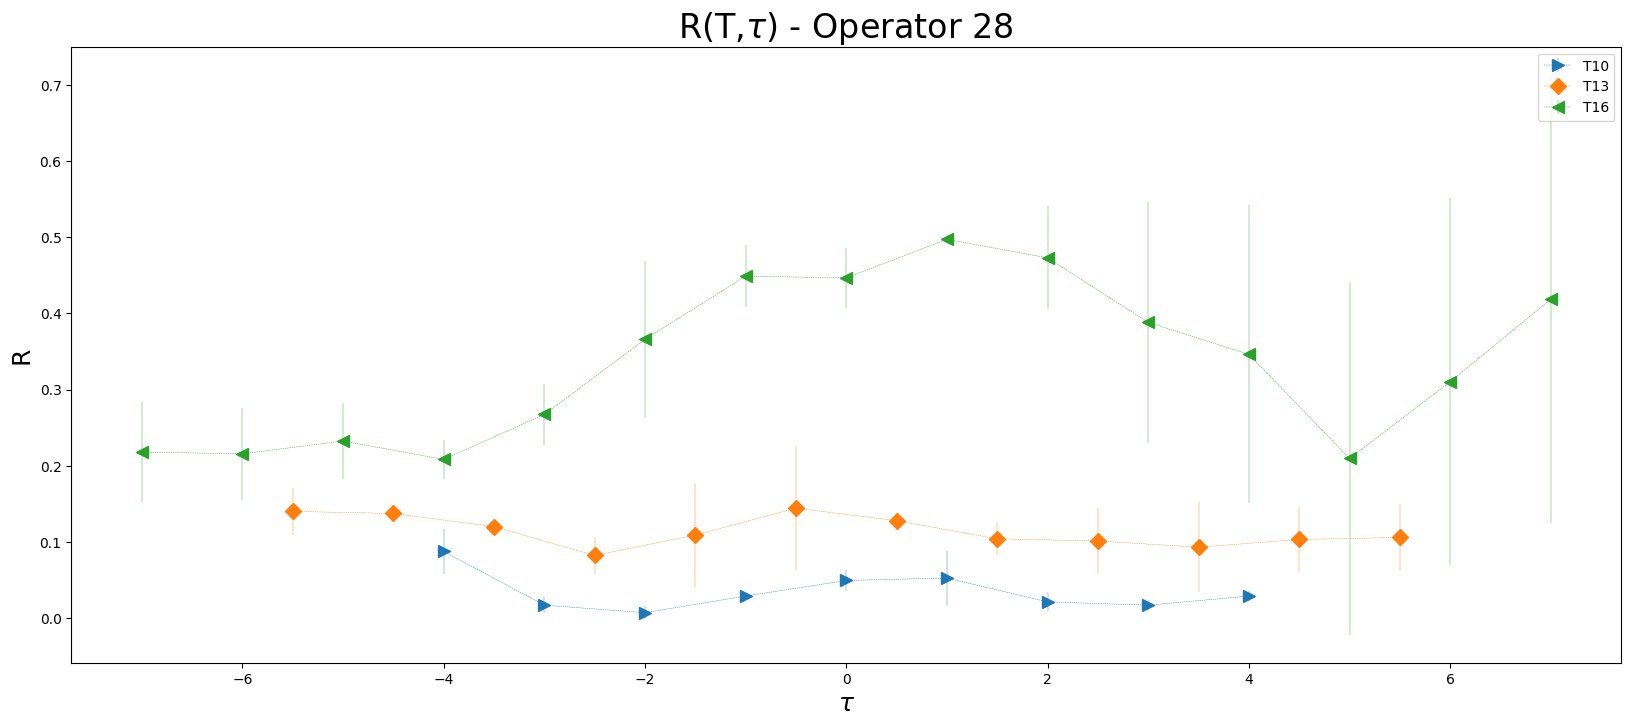

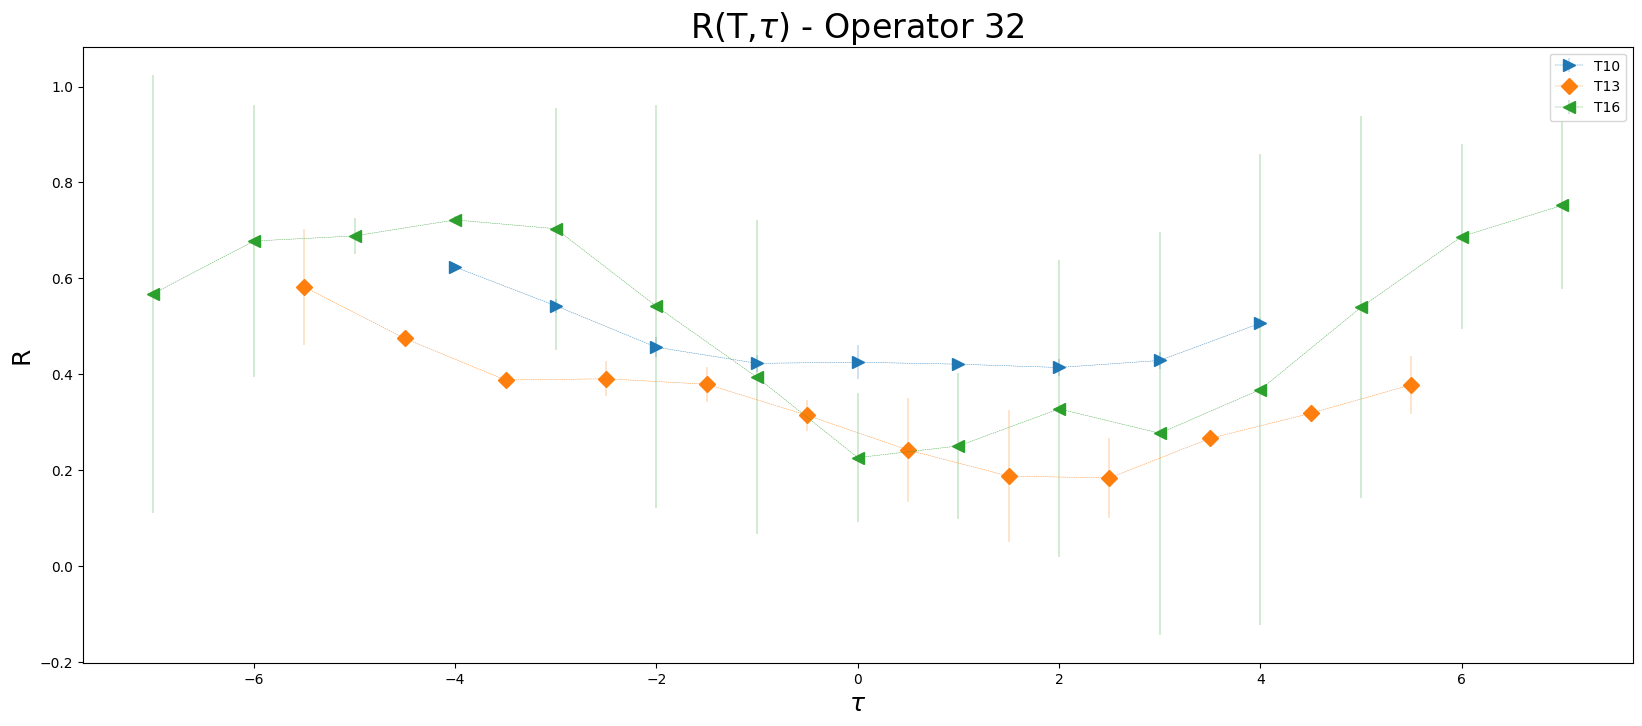

In [ ]:
ok2.select_operator(28,32)

ok2.plot_R(figsize=(20,8),fontsize_title=24,fontsize_x=18, fontsize_y=18, markersize=8)

In [ ]:
np.shape(op73.cgmat)

(4, 4, 4)

In [ ]:
op32 = ok2.get_operator(32)

np.shape(op32.cgmat)
len(np.shape(op32.cgmat))

(4, 4)

2